<a href="https://colab.research.google.com/github/alejandrobbb/ia-breast-cancer-biopsy/blob/main/Clasificacion_biopsias_tejido_cancerigeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*ABBB.*

#La arquitectura de este modelo de **Inteligencia Artificial** esta diseñada para clasificar **Cáncer en Biopsias de tejido mamario.**


####Clasificando los resultados de las muestras como; 
###**Benigno o Maligno.**


######Con certeza de un 93.0% a un 96.0% aproximadamente.

Esta red neuronal ha sido entrenada con un dataset de Kaggle de biopsias benignas y malignas Zoom x400, en total 1148 imágenes.

El total de imágenes se divide en dos subgrupos de dos, el modelo es entrenado aproximandamene con un 70% del total de imagenes y el 30% restante se usa para testear la fiabilidad de el modelo al finalizar el entrenamiento del mismo.

###Una inteligencia artificial básicamente es un conjunto de ecuaciones matemáticas que buscan la manera más optima de obtener "el mejor numero".

Hay demasiadas maneras de programar una I.A. pero las arquitecturas que simulan nuestra propia biología en diferentes aspectos son los sistemas más pulcros y con mejores resultados a la fecha de publicar este notebook, tales como lógica difusa, algoritmos genéticos evolutivos y redes neuronales...

##*Esta arquitectura esta implementada en un modelo secuencial de redes neuronales convolucionales, escrito en Python, Keras, Tensorflow y NumPy.*

He subido a Mega los archivos de descarga de los pesos de las redes neuronales ya entrenadas, los archivos correspondientes de las imagenes para entrenar o testear el modelo y el codigo estara en Github.

https://mega.nz/folder/A1kgFKTT#i8_7fVNRStklVMx1_Q_u-A

Mi correo personal es pvalejandrobbb@gmail.com, pero si necesitan contactarme pueden escribirme mas rapido por Instagram @alejandro.bbb o en Twitter a veces subo parte de mi codigo y los proyectos que estoy desarrollando.

In [ ]:
#importar librerias...
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization


In [ ]:
#Conectar drive con este Notebook de google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Tienes que conectar tu Drive con Google Colab, para que pueda hacer uso de las imagenes con las que vas a testar el modelo, organizar que las rutas sean las mismas o reescribirlas en el codigo...(Content/drive.../ruta_de_los_archivos)*

Dejare los archivos del Dataset para descargar y que los carguen desde su Drive, en caso que quieran testearlo, tambien dejare los archivo de los pesos de las redes neuronales ya entrenadas en caso que no quieran entrenarla de nuevo.

*En caso de querer reentrenar el modelo usando esta arquitectura, debes cargar el dataset completo o probar con uno diferente para otro tipo de clasificacion similar... para los resultados solo compila el archivo .h5 que son los pesos de las neuronas ya entrenadas de la Inteligencia Artificial.*

##Al dejar este codigo abierto busco promover su avance y que continuen su desarrollo, que se sientan en la libertad de modificarlo para implementarlo en problemas parecidos y en entornos de biomedicina para continuar su investigacion.
He documentado el codigo en español para que sea mas clara la lectura del codigo .py
#*No autorizo su uso para fines con animo de lucro.*

In [ ]:
#Estandarizar medidas e importar datos de entrenamiento
#llamando el directorio en drive
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/x400/train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 1148 images belonging to 2 classes.


In [ ]:
#Estandarizar medidas e importar datos de testeo
#llamando el directorio en drive
test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory("/content/drive/MyDrive/x400/test",
                                                           batch_size=32,
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

Found 545 images belonging to 2 classes.


In [ ]:
#Nombres de la clasificacion del output de la red neuronal
label =  {0:"benign",1:"malignant"}
for i in label.keys() :
    print(i,label[i])

0 benign
1 malignant


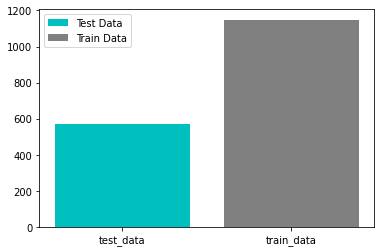

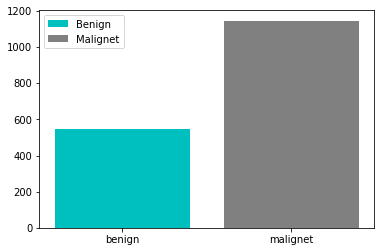

In [ ]:
#Graficar Datos
fig, axis = plt.subplots()
axis.bar("test_data", 572, color='c', label='Test Data')
axis.bar("train_data",1148 , color='gray', label='Train Data')
legend = axis.legend()
#Graficar datos
fig, axis = plt.subplots()
axis.bar("benign", 547, color='c', label='Benign')
axis.bar("malignet",1146 , color='gray', label='Malignet')
legend = axis.legend()

In [ ]:
#Construccion de la arquitectura del modelo de la Red Neuronal
model = Sequential([
Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(244,244,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,kernel_size= 3,padding='valid',activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Conv2D(128,kernel_size= 3,padding='valid',activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.2),
Flatten(),
Dense(256,activation='relu'),
Dropout(0.15),
Dense(128,activation='relu'),
Dense(2,activation='softmax')])
#Compilador del modelo (metricas para su optimizacion en las iteraciones de cada Epoca)
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
#"Early Stop" para guardar y hacer llamadas a modelos y arquitecturas guardadas anteriormente
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

#Entrenar el modelo un aproximado de 30 epocas / 
history = model.fit(train_data,
    validation_data = test_data , 
    callbacks=[early_stop],
    epochs = 30)

#recoger los datos para guardarlos en un archivo Pandas para visualizarlo mejor
histx1_df = pd.DataFrame(history.history)

Epoch 1/30
36/36 [==============================] - 259s 7s/step - loss: 1.0843 - accuracy: 0.6847 - val_loss: 0.7734 - val_accuracy: 0.3633
Epoch 2/30
36/36 [==============================] - 47s 1s/step - loss: 0.5220 - accuracy: 0.7787 - val_loss: 0.5145 - val_accuracy: 0.8477
Epoch 3/30
36/36 [==============================] - 47s 1s/step - loss: 0.4523 - accuracy: 0.8153 - val_loss: 0.4694 - val_accuracy: 0.8367
Epoch 4/30
36/36 [==============================] - 47s 1s/step - loss: 0.4432 - accuracy: 0.8319 - val_loss: 0.4837 - val_accuracy: 0.8459
Epoch 5/30
36/36 [==============================] - 47s 1s/step - loss: 0.4674 - accuracy: 0.8049 - val_loss: 0.4832 - val_accuracy: 0.8183
Epoch 6/30
36/36 [==============================] - 47s 1s/step - loss: 0.4187 - accuracy: 0.8406 - val_loss: 0.4643 - val_accuracy: 0.8514
Epoch 7/30
36/36 [==============================] - 47s 1s/step - loss: 0.4193 - accuracy: 0.8458 - val_loss: 0.5742 - val_accuracy: 0.6881
Epoch 8/30
36/36 [=

##Los resultados graficados son de los datos de las primeras 13 epocas, pero los pesos .h5 del link de descarga ya estan entrenados con 40 epocas. el resultado final de las dos predicciones de imagenes x400 fueron hechos cargando los pesos del modelo entrenado de 40 epocas.
el modelo segun testeos comienza a dar buenos resultados apartir de la epoca 20 y mas de 40 ya podria considerarse overfitting o sobre entrenamiento.

In [ ]:
#Convertir a csv los resultados Pandas 
histx1_csv_file = '/content/result_model_cancer.csv'
with open(histx1_csv_file, mode='w') as t:
    histx1_df.to_csv(t)

In [ ]:
histx1_df.to_csv('/content/result_model_cancer.csv', header =True, index=False)
histx1_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.084259,0.684669,0.773350,0.363303
1,0.521994,0.778746,0.514473,0.847706
2,0.452255,0.815331,0.469442,0.836697
3,0.443170,0.831882,0.483657,0.845872
4,0.467450,0.804878,0.483184,0.818349


In [ ]:
#guardar modelo entrenado pesos... archivo .h5
model.save("/content/drive/MyDrive/breast_cancerx.h5")

In [ ]:
#Setear los datos para graficar los resultados
sns.set()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

<Figure size 432x288 with 0 Axes>

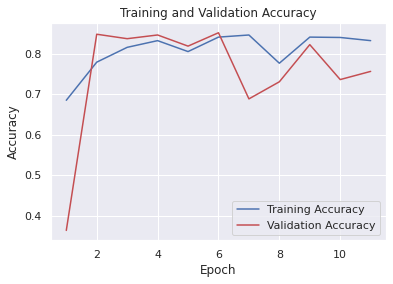

<Figure size 432x288 with 0 Axes>

In [ ]:
#Graficar "accuracy" exactitud
plt.plot(epochs, accuracy, color='b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

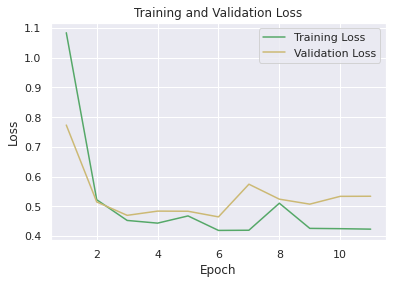

In [ ]:
#Graficar "loss" valor de perdida 
plt.plot(epochs, loss, color='g', label='Training Loss')
plt.plot(epochs, val_loss, color='y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#predecir con "Datos de testo" en arreglo array  
y_predict = model.predict(test_data)
y_predict = np.argmax(y_predict,axis=1)

y_predict

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

###*Cabe aclarar que para la correcta clasificiacion por parte del modelo, la imagen asignada como input debe cumplir con las caracteristicas indicadas con las que fue el entrenamiento de la misma red neuronal, con el debido post-procesamiento de las primeras lineas de codigo para que sea compatible con la arquitectura de esta I.A. y tener buenos resultados*

[0]
benign


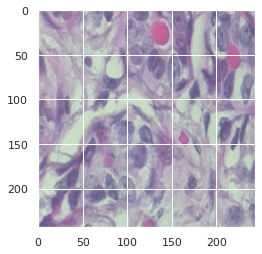

In [ ]:
#predecir con los pesos .h5 que esten "cargados / load" de las neuronas una imagen (de la direccion asignada ../content/ubicacion_de_la_imagen_a_evaluar...)
img_ = image.load_img("/content/drive/MyDrive/x400/train/benign/SOB_B_A-14-22549AB-400-022.png", target_size=(244, 244))
#Testeo de una imagen x400 de una biopsia benigna
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

[1]
malignant


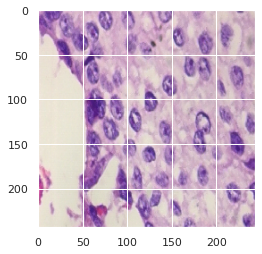

In [ ]:
#predecir otra clasificacion con una imagen diferente... (celulas malignas en este caso)
img_ = image.load_img("/content/drive/MyDrive/x400/test/malignant/SOB_M_DC-14-11031-400-014.png", target_size=(244, 244))
#Testeo de una imagen x400 de una biopsia maligna
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

In [ ]:
#Importar pesos ya entrenados .h5 en caso de querer evitar todo el entrenamiento, y solo cargan los pesos que dejare para descargar
model = keras.models.load_model("/content/drive/MyDrive/breast_cancer_4.h5")

In [ ]:
#graficar datos II
import plotly.express as px
fig = px.scatter_3d(histx1_df, x='val_accuracy', y='accuracy', z='val_loss',
                    color='val_loss',
                    size='val_loss', size_max=18,
                    opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))